# 과제3. 직원 이직 분석

* 여러분은 OO회사의 **데이터분석가** 입니다.
* **인사팀**에서는 여러분에게 우리 회사 직원의 **이직(Attrition)에 영향을 주는 요인**을 분석해달라고 요청해 왔습니다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [231]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

* 분석 단위 : 직원 한사람, 한사람...
* 설명에서 언급되어지지 않은 사항은 직접 고민하며 스스로 정해서 진행하시면 됩니다.^^
* 자\~! 이제 시작해 봅시다\~!

----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 3개 이상씩, 전체 6개 이상의 변수를 도출, 가설을 수립하시오.

* 가설1 : DistanceFromHome(집-직장 거리)에 따라 Attrition(이직 여부)는 달라진다.

* 가설2 : MonthlyIncome(월급)에 따라 Attrition(이직 여부)는 달라진다.

* 가설3 : PercentSalaryHike(전년대비 급여인상율)에 따라 Attrition(이직 여부)는 달라진다.

* 가설4 : JobSatisfaction(직무 만족도) 에 따라 Attrition(이직 여부)는 달라진다.

* 가설5 : RelationshipSatisfaction(동료와의 관계)에 따라 Attrition(이직 여부)는 달라진다.

* 가설6 : WorkLifeBalance(워라밸. 일-삶 균형도)에 따라 Attrition(이직 여부)는 달라진다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) target_Attrition

In [232]:
target = data['Attrition']

① 변수의 비즈니스 의미

> - 이직여부, Yes , No

② 숫자? 범주?

> - 범주

③ NaN 존재 여부 및 조치 방안

In [233]:
target.isna().sum()

0

> NaN이 존재하지 않음

④ 기초통계량

In [234]:
print('범주별 빈도수')
print(target.value_counts())

print('---'*10)
print('---'*10)

print('범주별 비율')
print(target.value_counts() / len(target))

범주별 빈도수
0    1050
1     200
Name: Attrition, dtype: int64
------------------------------
------------------------------
범주별 비율
0    0.84
1    0.16
Name: Attrition, dtype: float64


⑤ 분포

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


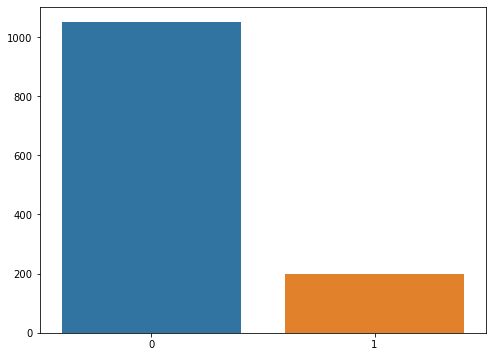

In [235]:
plt.figure(figsize=(8, 6))
cnt = target.value_counts()
sns.barplot(cnt.index, cnt.values)
plt.show()

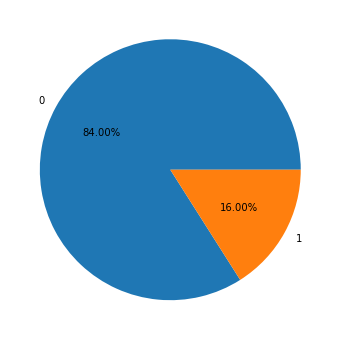

In [236]:
plt.figure(figsize=(8, 6))
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

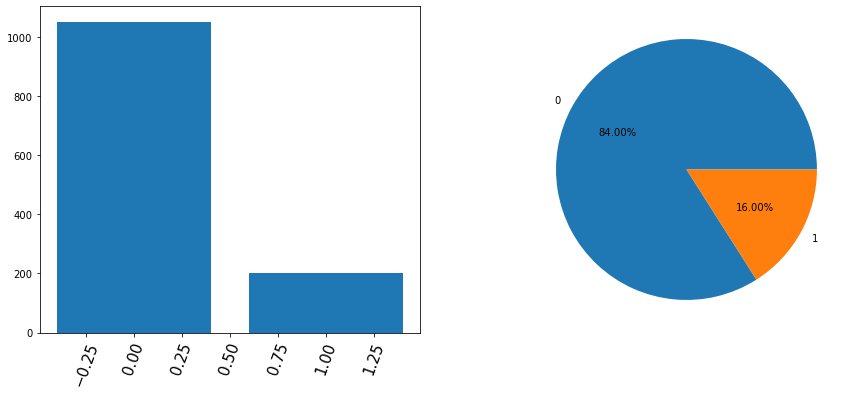

In [237]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
cnt = target.value_counts()
plt.bar(cnt.index, cnt.values)
plt.xticks(fontsize=15,rotation=70)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스 인사이트) 정리

> - 이직하는 직원이 전체의 16%로 이직율이 낮은편으로 보인다.
> - 이직한 직원의 데이터를 분석하여 공통적인 원인을 파악해본다.

### 2) feature1_DistanceFromHome

In [238]:
feature = data['DistanceFromHome']

① 변수의 비즈니스 의미

> - 집-직장 거리

② 숫자? 범주?

> - 숫자

③ NaN 존재 여부 및 조치 방안

In [239]:
feature.isna().sum()

54

> NaN이 54개 존재

- 조치 방안 : 결측치를 평균값으로 채운다.

- 이유 : 제거하기엔 54명의 데이터는 결코 작은 수가 아니고, 장기적으로 봤을 때 또 결측치가 나올 수 있는 가능성이 있기 때문에 평균값으로 채우기로 결정한다.

In [240]:
mean_dis = data['DistanceFromHome'].mean()
data['DistanceFromHome'].fillna(mean_dis, inplace=True)
feature.isna().sum()

0

> Nan 제거

④ 기초통계량

In [241]:
feature.describe()

count    1250.000000
mean        9.258361
std         7.987539
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

⑤ 분포

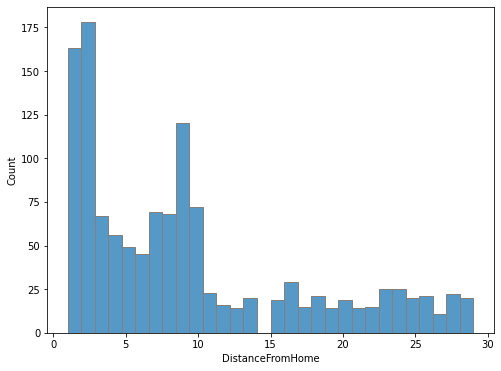

In [242]:
plt.figure(figsize=(8, 6))
sns.histplot(feature, bins = 30, edgecolor = 'gray')
plt.show()

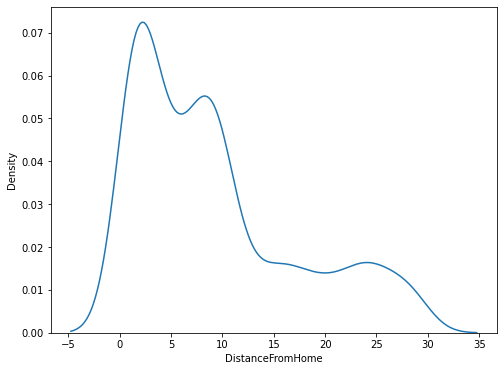

In [243]:
plt.figure(figsize=(8, 6))
sns.kdeplot(feature)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


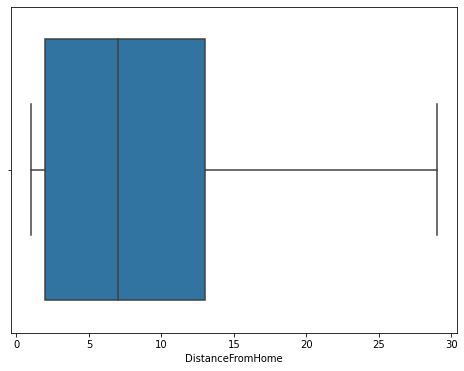

In [244]:
plt.figure(figsize=(8, 6))
sns.boxplot(feature)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


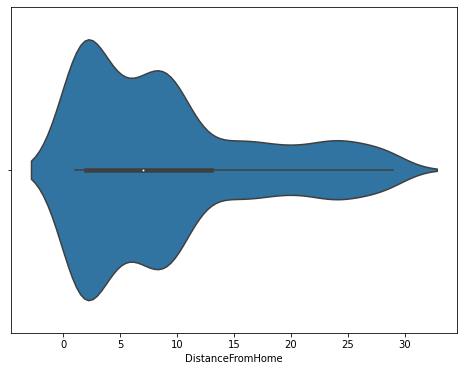

In [245]:
plt.figure(figsize=(8, 6))
sns.violinplot(feature)
plt.show()

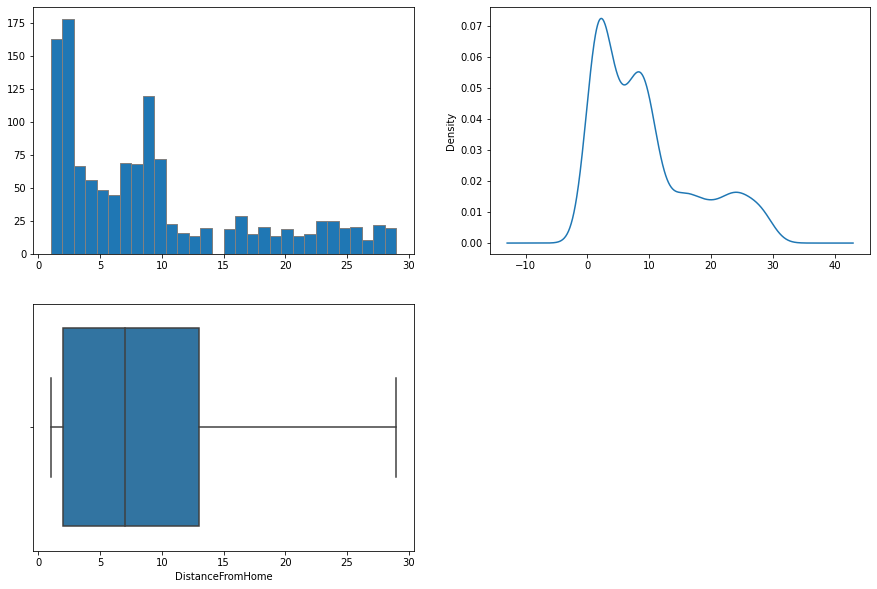

In [246]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(feature, bins = 30, edgecolor = 'gray')

plt.subplot(2, 2, 2)
feature.plot(kind = 'kde')

plt.subplot(2, 2, 3)
sns.boxplot(x=feature, data=data)
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스 인사이트) 정리

> - 집과 직장과의 거리의 분포가 5, 15 마일을 기점으로 나누어 지는 모습이 보인다.
> -  --> 추가분석 진행
> - 집과 직장과의 거리가 가까운 직원들이 많다.
> - --> 회사에서 직원들을 위한 주택 제공, 보증금 대출 등의 복지를 진행하고 있는가? 
> - 멀리 사는 직원들을 위한 통근 버스 복지를 제공하면 좋을 것 같다.

⑦ 추가 분석해볼 사항 도출

> - 5, 15마일을 기점으로 집단을 나눠서 이직여부와 분석해본다

### 3) feature2_MonthlyIncome

In [247]:
feature = data['MonthlyIncome']

① 변수의 비즈니스 의미

> - 월급

② 숫자? 범주?

> - 숫자

③ NaN 존재 여부 및 조치 방안

In [248]:
feature.isna().sum()

0

> - NaN이 존재하지 않음

④ 기초통계량

In [249]:
feature.describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

⑤ 분포

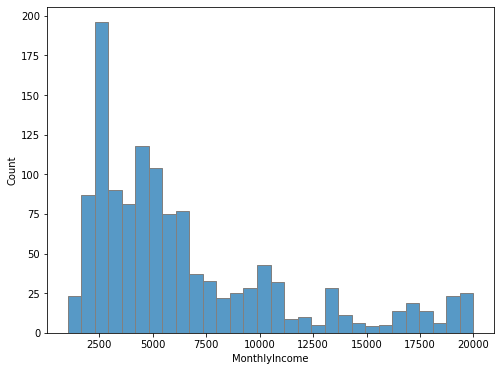

In [250]:
plt.figure(figsize=(8, 6))
sns.histplot(feature, bins = 30, edgecolor = 'gray')
plt.show()

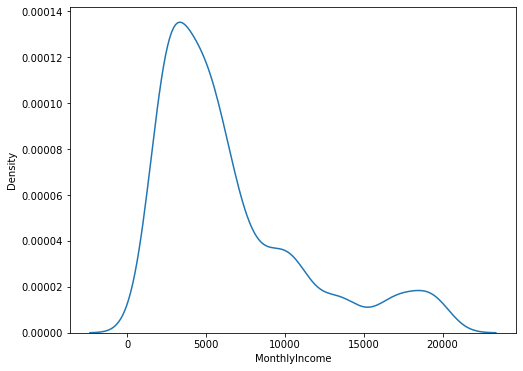

In [251]:
plt.figure(figsize=(8, 6))
sns.kdeplot(feature)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


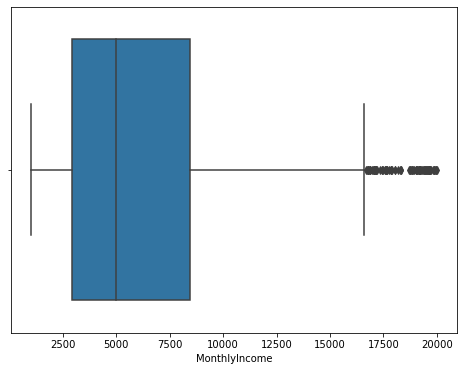

In [252]:
plt.figure(figsize=(8, 6))
sns.boxplot(feature)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


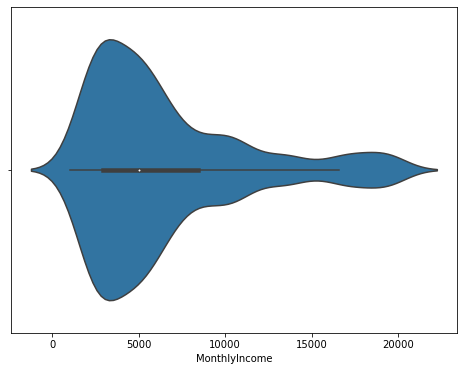

In [253]:
plt.figure(figsize=(8, 6))
sns.violinplot(feature)
plt.show()

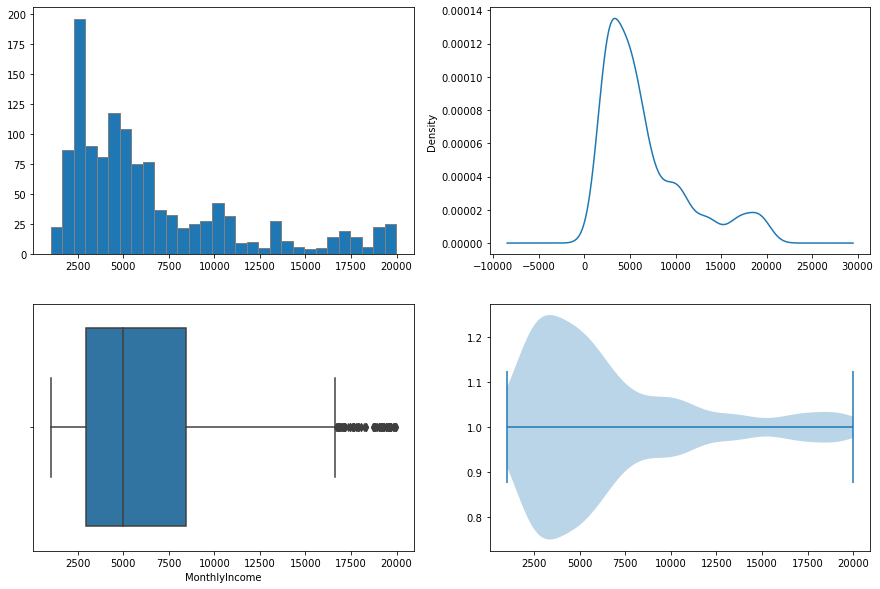

In [254]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(feature, bins = 30, edgecolor = 'gray')

plt.subplot(2, 2, 2)
feature.plot(kind = 'kde')

plt.subplot(2, 2, 3)
sns.boxplot(x=feature, data=data)

plt.subplot(2, 2, 4)
plt.violinplot(feature, vert=False)
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스 인사이트) 정리

> - 오른쪽으로 꼬리가 긴 분포 형태를 보인다. 
> - 봉우리 기점이 6지점 정도로 보이는데, 이 회사의 직급이 크게 6가지인가?
> - 이 회사의 월급의 최솟값이 1009달러로 시작한다면, 빈도가 가장 많은 값이 2500달러인데 2500달러까지 월급 인상이 언제까지 이루어지는지??
> - --> 그 기간이 너무 길다면 이직을 고려할 수 있지 않을까?
> - 같은 관점에서, 2500달러에서 두 번째로 빈도가 높아보이는 5000달러까지의 기간이 어느정도??
> - 첫번째 관점보다 두 번째 관점의 기간이 더 중요해 보이는 이유는 그 기간 동안 직원은 경력이 채워지고 업무의 경험도 쌓았기 때문에 이직할 수 있는 여건이 충분해 보이기 때문

### 4) feature3_PercentSalaryHike

In [255]:
feature = data['PercentSalaryHike']

① 변수의 비즈니스 의미

> 전년대비 급여인상율

② 숫자? 범주?

> - 숫자

③ NaN 존재 여부 및 조치 방안

In [256]:
feature.isna().sum()

0

> NaN이 존재하지 않음

④ 기초통계량

In [257]:
feature.describe()

count    1250.000000
mean       15.216000
std         3.625556
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

⑤ 분포

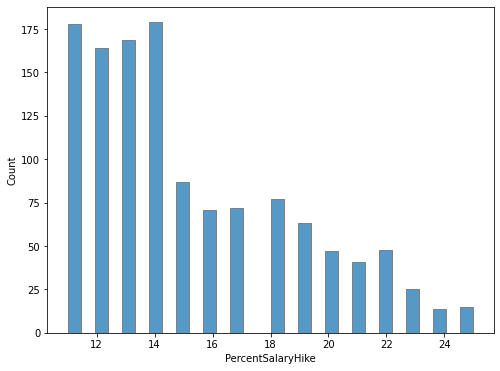

In [258]:
plt.figure(figsize=(8, 6))
sns.histplot(feature, bins = 30, edgecolor = 'gray')
plt.show()

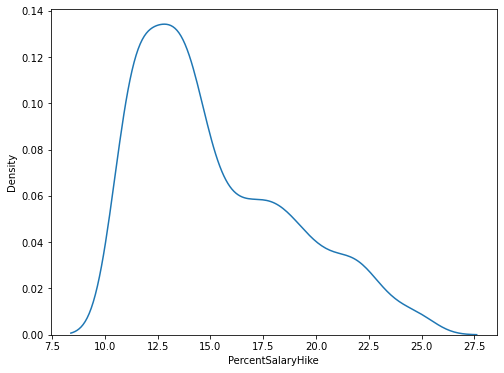

In [259]:
plt.figure(figsize=(8, 6))
sns.kdeplot(feature)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


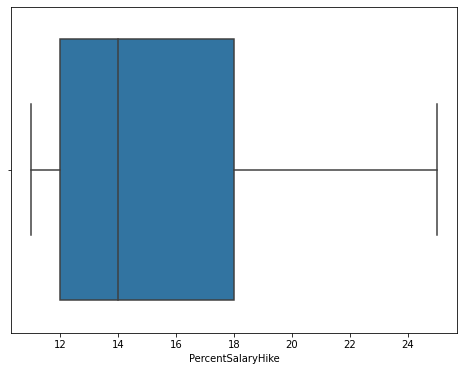

In [260]:
plt.figure(figsize=(8, 6))
sns.boxplot(feature)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


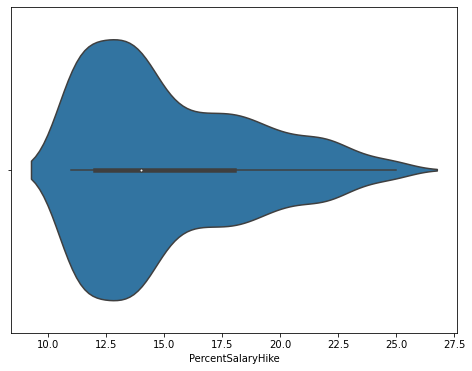

In [261]:
plt.figure(figsize=(8, 6))
sns.violinplot(feature)
plt.show()

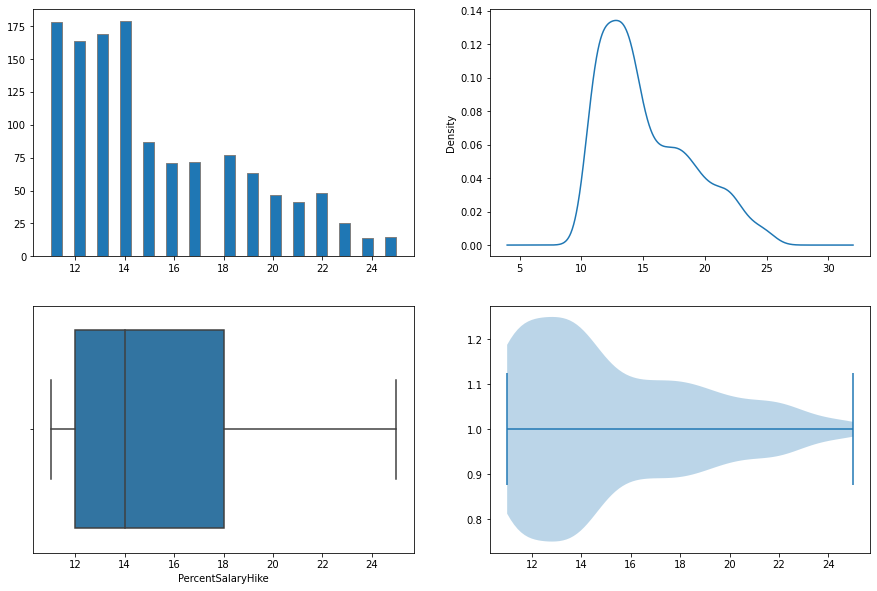

In [262]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(feature, bins = 30, edgecolor = 'gray')

plt.subplot(2, 2, 2)
feature.plot(kind = 'kde')

plt.subplot(2, 2, 3)
sns.boxplot(x=feature, data=data)

plt.subplot(2, 2, 4)
plt.violinplot(feature, vert=False)
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스 인사이트) 정리

> - 전년대비 급여인상율의 최솟값이 11%이기 때문에 이 회사가 전년에 많은 성과가 있어서 전 직원에게 급여를 인상해준 것으로 보인다.
> - 가장 많이 나타나는 빈도는 12.5%의 급여인상율이다
> - 급여인상율 15%를 기점으로 분포가 줄어든다.
> - --> 15% 이상을 받은 사람은 이직율이 낮을 것으로 추정

⑦ 추가 분석해볼 사항 도출

> - 이번해 월급과 전년 대비 월급 인상율을 계산하여 두 분포를 파악
> - 급여인상율 15%를 기준으로 두 분포를 나눠서 이직율 파악

### 5) feature4_JobSatisfaction

In [263]:
feature = data['JobSatisfaction']

① 변수의 비즈니스 의미

> - 직무 만족도

② 숫자? 범주?

> - 범주

③ NaN 존재 여부 및 조치 방안

In [264]:
feature.isna().sum()

0

> NaN이 존재하지 않음

④ 기초통계량

In [265]:
print('범주별 빈도수')
print(feature.value_counts())

print('---'*10)
print('---'*10)

print('범주별 비율')
print(feature.value_counts() / len(feature))

범주별 빈도수
4    397
3    368
1    250
2    235
Name: JobSatisfaction, dtype: int64
------------------------------
------------------------------
범주별 비율
4    0.3176
3    0.2944
1    0.2000
2    0.1880
Name: JobSatisfaction, dtype: float64


⑤ 분포

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


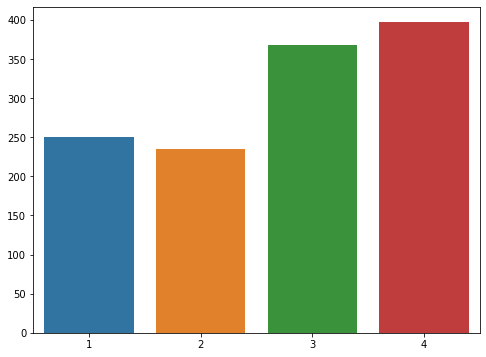

In [266]:
plt.figure(figsize=(8, 6))
cnt = feature.value_counts()
sns.barplot(cnt.index, cnt.values)
plt.show()

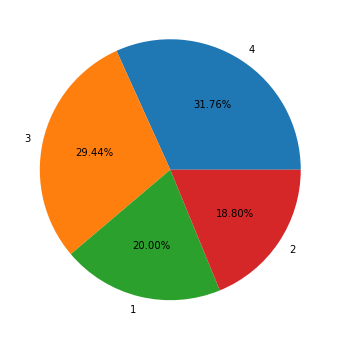

In [267]:
plt.figure(figsize=(8, 6))
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

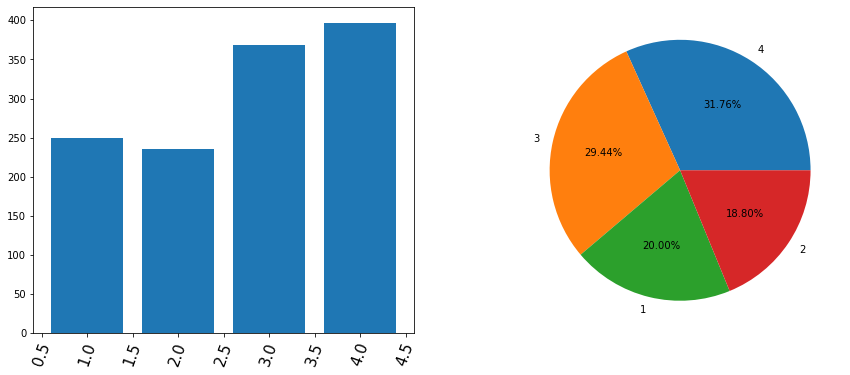

In [268]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
cnt = feature.value_counts()
plt.bar(cnt.index, cnt.values)
plt.xticks(fontsize=15,rotation=70)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스 인사이트) 정리

> - '높음'과 '매우 높음'의 합이 약 60%로 전반적으로 직원들이 직무에 만족하는 것으로 보인다.
> - '매우 낮음'을 답한 이유를 무기명으로 설문을 하여 원인을 파악해볼 필요가 있다.
> - 특히 '매우 낮음'으로 답한 직원들의 이직율이 가장 높을 것 같다.
> - --> 자신이 원하는 직무를 찾기 위해 이직을 하지 않을까?

⑦ 추가 분석해볼 사항 도출

> - '높음'과 '매우 높음' 한 집단, '보통'과 '매우 낮음'의 한 집단, 총 2집단으로 분류하여 이직율 파악

### 6) feature5_RelationshipSatisfaction

In [269]:
feature = data['RelationshipSatisfaction']

① 변수의 비즈니스 의미

> - 동료와의 관계

② 숫자? 범주?

> - 범주

③ NaN 존재 여부 및 조치 방안

In [270]:
feature.isna().sum()

0

> NaN이 존재하지 않음

④ 기초통계량

In [271]:
print('범주별 빈도수')
print(feature.value_counts())

print('---'*10)
print('---'*10)

print('범주별 비율')
print(feature.value_counts() / len(feature))

범주별 빈도수
3    397
4    365
2    258
1    230
Name: RelationshipSatisfaction, dtype: int64
------------------------------
------------------------------
범주별 비율
3    0.3176
4    0.2920
2    0.2064
1    0.1840
Name: RelationshipSatisfaction, dtype: float64


⑤ 분포

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


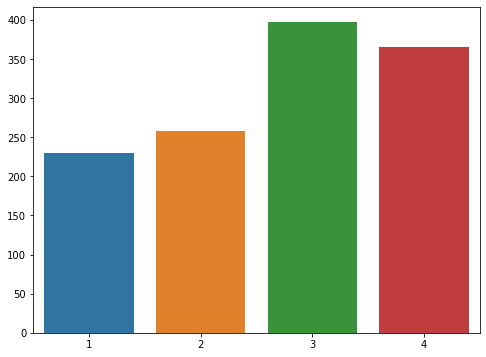

In [272]:
plt.figure(figsize=(8, 6))
cnt = feature.value_counts()
sns.barplot(cnt.index, cnt.values)
plt.show()

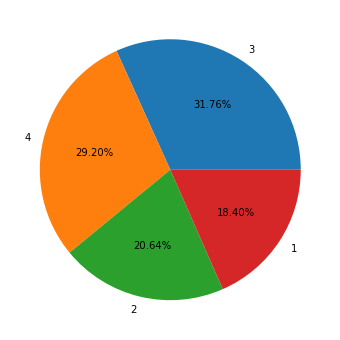

In [273]:
plt.figure(figsize=(8, 6))
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

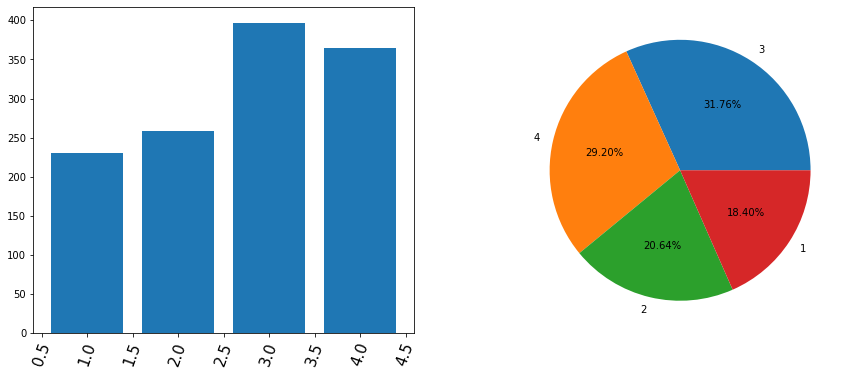

In [274]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
cnt = feature.value_counts()
plt.bar(cnt.index, cnt.values)
plt.xticks(fontsize=15,rotation=70)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스 인사이트) 정리

> - '높음'과 '매우 높음'을 답한 직원이 약 60%로 전반적으로 직원들이 동료와의 관계가 원만해 보인다.
> - '낮음'을 답한 직원이 18%로 결코 작지 않은 숫자다.
> - --> '낮음'을 답한 직원들을 대상으로 무기명 설문을 진행하여 원인을 파악한다.

### 7) feature6_WorkLifeBalance

In [275]:
feature = data['WorkLifeBalance']

① 변수의 비즈니스 의미

> - 워라밸. 일-삶 균형도

② 숫자? 범주?

> - 범주

③ NaN 존재 여부 및 조치 방안

In [276]:
feature.isna().sum()

0

> NaN이 존재하지 않음

④ 기초통계량

In [277]:
print('범주별 빈도수')
print(feature.value_counts())

print('---'*10)
print('---'*10)

print('범주별 비율')
print(feature.value_counts() / len(feature))

범주별 빈도수
3    747
2    297
4    137
1     69
Name: WorkLifeBalance, dtype: int64
------------------------------
------------------------------
범주별 비율
3    0.5976
2    0.2376
4    0.1096
1    0.0552
Name: WorkLifeBalance, dtype: float64


⑤ 분포

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


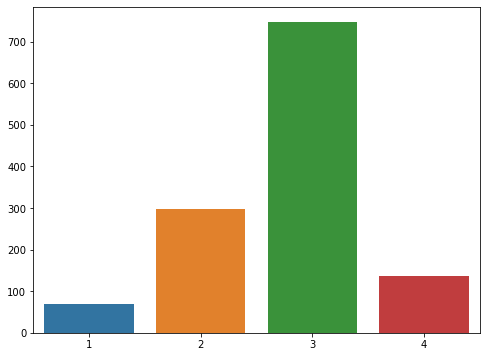

In [278]:
plt.figure(figsize=(8, 6))
cnt = feature.value_counts()
sns.barplot(cnt.index, cnt.values)
plt.show()

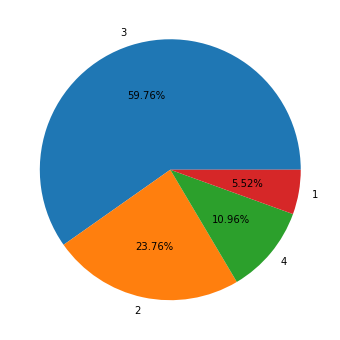

In [279]:
plt.figure(figsize=(8, 6))
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

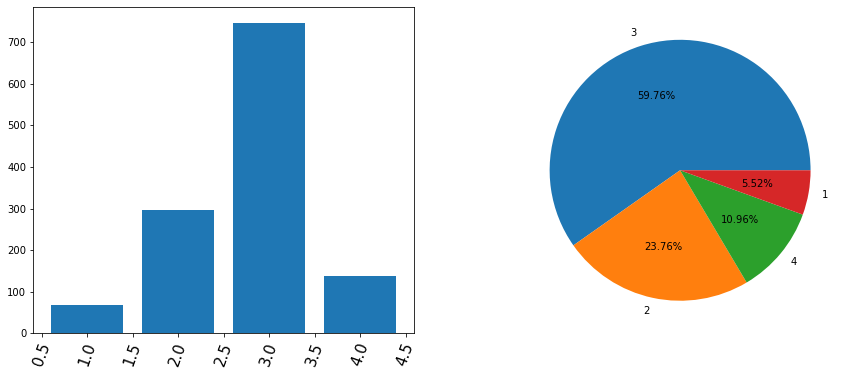

In [280]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
cnt = feature.value_counts()
plt.bar(cnt.index, cnt.values)
plt.xticks(fontsize=15,rotation=70)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스 인사이트) 정리

> - 긍정적인 답변을 한 직원이 약 95%로 대부분의 직원들이 워라벨에 만족을 하는 것으로 파악된다.
> - 첫번째로 많이 답한 것이 59% 'Better'인데 세 번째로 많이 답한 것이 10% 'best'로 약 6배 이상이 차이가 난다.
> - --> 회사에서 복지 서비스나 자율 출퇴근 등을 시행하고, 업무 중간중간에 리프레쉬할 수 있는 짧은 여가 활동을 지원하면 많은 직원들의 워라벨이 올라가지 않을까?

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) JobSatisfaction --> Attrition

In [281]:
feature = data['JobSatisfaction']

In [282]:
# 전체 이직율
total_mean = target.mean()
print('전체 이직율 :', total_mean)

전체 이직율 : 0.16


① 교차표

In [283]:
temp = pd.crosstab(feature, target, normalize = 'index')
print(temp)

Attrition               0         1
JobSatisfaction                    
1                0.788000  0.212000
2                0.834043  0.165957
3                0.836957  0.163043
4                0.879093  0.120907


② 시각화(Stacked Bar, Mosaic)

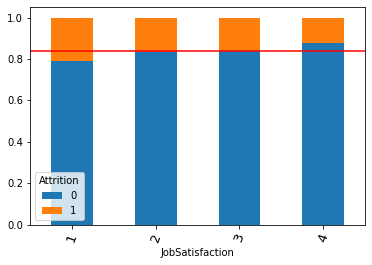

In [284]:
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r') # 평균선 추가
plt.xticks(fontsize=13, rotation=70)
plt.show()

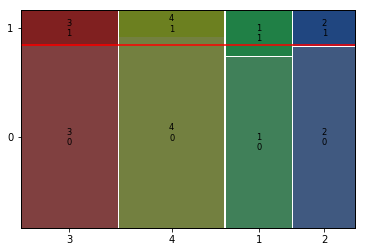

In [285]:
mosaic(data, [ 'JobSatisfaction','Attrition'])
plt.axhline(1- total_mean, color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [286]:
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 0.030102940693838072
p-value 0.9986233818102358
기대빈도
 [[0.83452307 0.16547693]
 [0.83452307 0.16547693]
 [0.83452307 0.16547693]
 [0.83452307 0.16547693]]


분석 결과

> - 시각화 결과에서 전체 평균값과 각 집단이 차이가 있기 때문에 직무 만족도와 이직 여부는 관련이 있어보인다. 
> - 하지만, 카이제곱 검정 결과 p-value가 0.05보다 매우 크기 때문에 관련이 없는 것으로 나온다.
> - 두 집단으로 추가 분석을 진행하여 직무 만족도와 이직 여부의 관련성을 파악해본다.

#### 1)-1.[추가분석] 직무만족도를 2개의 집단으로 나누고 분석

- 데이터 레이블 변경  

1 낮음 + 2 보통 => 만족하지 않음 (0)  

3 높음 + 4 매우 높음 => 만족 (1)

- 새로운 열 만들기

In [287]:
data['j_g'] = data['JobSatisfaction'].map( { 1:0, 2:0, 3:1, 4:1 })

① 교차표

In [288]:
feature = data['j_g']
temp = pd.crosstab(feature, target, normalize = 'index')

② 시각화(Stacked Bar, Mosaic)

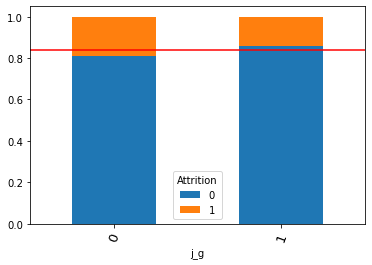

In [289]:
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r') # 평균선 추가
plt.xticks(fontsize=13, rotation=70)
plt.show()

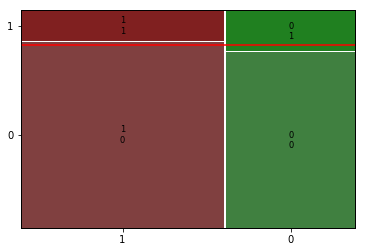

In [290]:
mosaic(data, [ 'j_g','Attrition'])
plt.axhline(1- total_mean, color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [291]:
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 3.2786116067832665
p-value 0.07018828154011003
기대빈도
 [[0.8345664 0.1654336]
 [0.8345664 0.1654336]]


④ 분석결과

> - 시각화 결과 전체 이직율과 두 집단의 평균차이가 조금 보인다.
> - 카이제곱 검정 결과 p-value가 0.07로 0.05보다 크기 때문에 직무만족도와 이직여부는 관련이 약하게 있어보인다.

#### 2) RelationshipSatisfaction --> Attrition

In [292]:
feature = data['RelationshipSatisfaction']

① 교차표

In [293]:
temp = pd.crosstab(feature, target, normalize = 'index')
print(temp)

Attrition                        0         1
RelationshipSatisfaction                    
1                         0.795652  0.204348
2                         0.841085  0.158915
3                         0.848866  0.151134
4                         0.857534  0.142466


② 시각화(Stacked Bar, Mosaic)

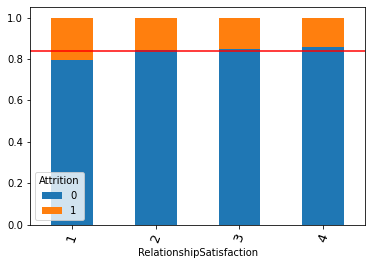

In [294]:
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r') # 평균선 추가
plt.xticks(fontsize=13, rotation=70)
plt.show()

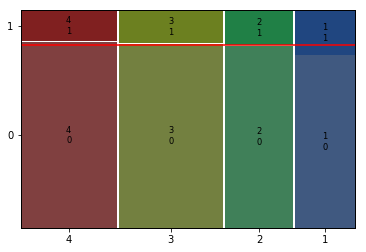

In [295]:
mosaic(data, [ 'RelationshipSatisfaction','Attrition'])
plt.axhline(1- total_mean, color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [296]:
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 0.016633245458495115
p-value 0.9994323008896482
기대빈도
 [[0.83578455 0.16421545]
 [0.83578455 0.16421545]
 [0.83578455 0.16421545]
 [0.83578455 0.16421545]]


분석 결과

> - 시각화에서는 동료와의 관계가 낮음을 답한 집단과 높음을 답한 집단의 이직율의 차이가 보인다.
> - 하지만, 카이제곱 검정 결과 p-value가 0.05보다 큰 값이 나오므로 동료와의 관계와 이직 여부는 관련이 없는 것으로 나온다.
> - 추가분석을 진행하여 동료와의 관계가 좋음/낮음 크게 2개의 집단으로 나눠서 이직율과의 관련성을 파악한다.

#### 2)-1.[추가분석] 동료와의 관계를 2개의 집단으로 나누고 분석

- 데이터 레이블 변경  

1 낮음 + 2 보통 => 좋지 않음 (0)  

3 높음 + 4 매우 높음 => 좋음 (1)

- 새로운 열 만들기

In [297]:
data['r_g'] = data['RelationshipSatisfaction'].map( { 1:0, 2:0, 3:1, 4:1 })

① 교차표

In [298]:
feature = data['r_g']
temp = pd.crosstab(feature, target, normalize = 'index')

② 시각화(Stacked Bar, Mosaic)

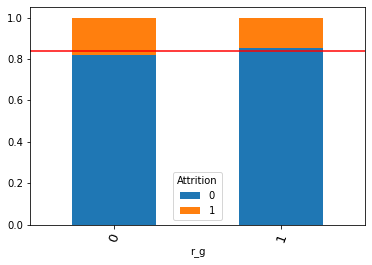

In [299]:
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r') # 평균선 추가
plt.xticks(fontsize=13, rotation=70)
plt.show()

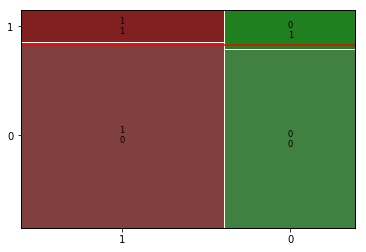

In [300]:
mosaic(data, [ 'r_g','Attrition'])
plt.axhline(1- total_mean, color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [301]:
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 3.4134825454808295
p-value 0.06466584083974757
기대빈도
 [[0.83634525 0.16365475]
 [0.83634525 0.16365475]]


④ 분석결과

> - 시각화 결과 전체 이직율 평균과 두 집단과는 차이가 조금 있어보인다.
> - 위에서 진행한 p-value보다 작게 나온 것을 볼 수 있다.
> - 카이제곱 검정 결과 p-value가 0.06으로 0.05보다 크기 때문에 동료와의 관계와 이직여부는 약한 관계가 있어보인다.

#### 3) WorkLifeBalance --> Attrition

In [302]:
feature = data['WorkLifeBalance']

① 교차표

In [303]:
temp = pd.crosstab(feature, target, normalize = 'index')
print(temp)

Attrition               0         1
WorkLifeBalance                    
1                0.710145  0.289855
2                0.845118  0.154882
3                0.855422  0.144578
4                0.810219  0.189781


② 시각화(Stacked Bar, Mosaic)

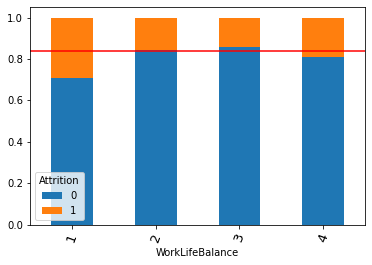

In [304]:
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r') # 평균선 추가
plt.xticks(fontsize=13, rotation=70)
plt.show()

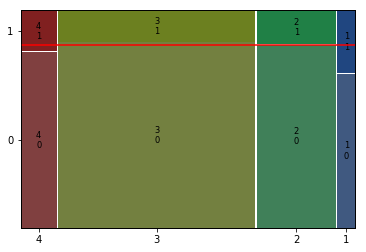

In [305]:
mosaic(data, [ 'WorkLifeBalance','Attrition'])
plt.axhline(1- total_mean, color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [306]:
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 0.08401264856679624
p-value 0.9936843761085588
기대빈도
 [[0.80522586 0.19477414]
 [0.80522586 0.19477414]
 [0.80522586 0.19477414]
 [0.80522586 0.19477414]]


분석 결과

> - 시각화 결과에서 워라벨이 낮음을 답한 이직율과 높음을 답한 이직율의 차이가 분명히 존재하여 워라벨과 이직은 관련이 있어보이는데
> - 카이제곱 검정 결과 p-value가 0.05보다 크게 나오므로 관련이 없다고 나온다.
> - 추가 분석을 진행하여 크게 워라벨이 좋다/나쁘다 2개의 집단으로 나눠서 이직율과의 관련성을 파악한다.

#### 3)-1.[추가분석] 워라벨을 2개의 집단으로 나누고 분석

- 데이터 레이블 변경  

1 Bad  => 나쁨 (0)  

2 Good + 3 Better + 4 Best => 좋음 (1)

- 새로운 열 만들기

In [307]:
data['w_g'] = data['WorkLifeBalance'].map( { 1:0, 2:1, 3:1, 4:1 })

① 교차표

In [308]:
feature = data['w_g']
temp = pd.crosstab(feature, target, normalize = 'index')

② 시각화(Stacked Bar, Mosaic)

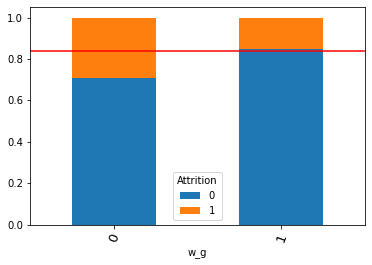

In [309]:
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r') # 평균선 추가
plt.xticks(fontsize=13, rotation=70)
plt.show()

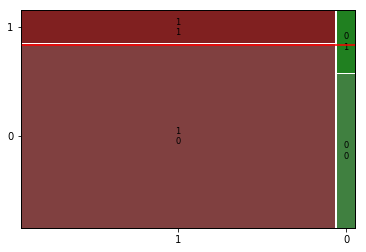

In [310]:
mosaic(data, [ 'w_g','Attrition'])
plt.axhline(1- total_mean, color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [311]:
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 2.1598733768828984
p-value 0.14165636318164504
기대빈도
 [[0.77886586 0.22113414]
 [0.77886586 0.22113414]]


④ 분석결과

> - 시각화 결과 막대그래프에서는 유의미한 평균차이가 보였지만
> - 모자익 그래프에서는 1에 응답자를 많이 해둔 것이 보인다. 
> - 카이제곱 검정 결과 p-value가 0.14로 0.05보다 크므로 워라벨과 이직여부는 관련이 없어보인다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) DistanceFromHome --> Attrition

In [312]:
feature = data['DistanceFromHome']

① 그래프 : histogram, densityplot

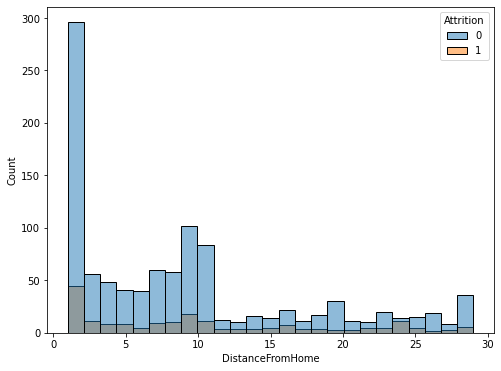

In [313]:
plt.figure(figsize=(8, 6))
sns.histplot(x=feature, data = data, hue = target, bins=25)
plt.show()

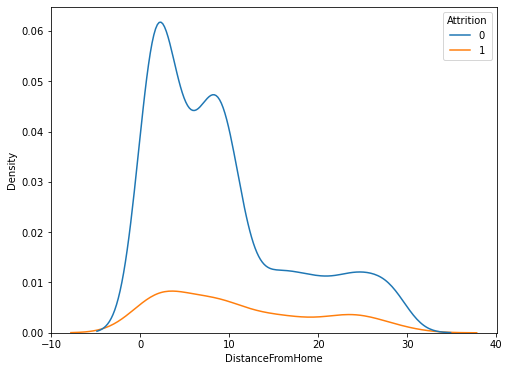

In [314]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=feature, data = data, hue = target)
plt.show()

② 수치화 : (참고)로지스틱회귀

In [315]:
model = sm.Logit(data['Attrition'], data['DistanceFromHome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.562055
         Iterations 6
DistanceFromHome    5.890702e-48
dtype: float64


분석 결과

> - 단변량 분석에서 거리가 멀수록 이직율이 높을 것이라 생각했는데, 이직을 한 사람중에서 회사와 가까운 사람이 이직을 가장 많이 한 것으로 나타난다.
> - 참고) 로지스틱 회귀 분석 결과 p-value가 0.05보다 작게 나와서 집-직장 거리와 이직여부는 관련이 있어보인다
> - 약 10마일과 25마일을 기점으로 빈도수가 늘어나는 것이 보이는데 이 지점전까지만 통근버스가 운행을 하지 않을까?

#### 2) MonthlyIncome --> Attrition

In [316]:
feature = data['MonthlyIncome']

① 그래프 : histogram, densityplot

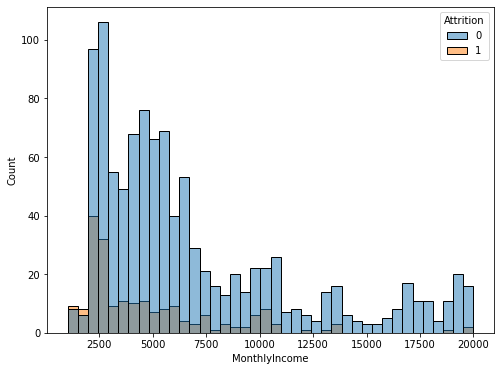

In [317]:
plt.figure(figsize=(8, 6))
sns.histplot(x=feature, data = data, hue = target, bins=40)
plt.show()

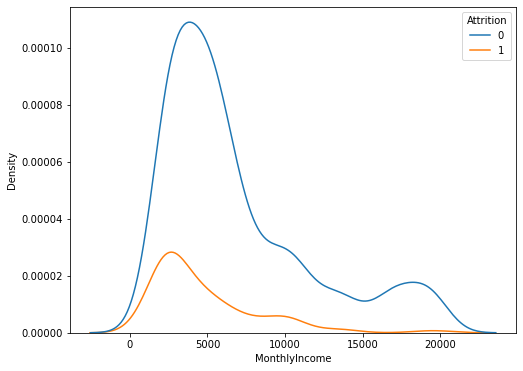

In [318]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=feature, data = data, hue = target)
plt.show()

② 수치화 : (참고)로지스틱회귀

In [319]:
model = sm.Logit(data['Attrition'], data['MonthlyIncome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


분석 결과

> - 2500달러를 기준으로 이직율의 큰 차이를 보인다.
> - 월급의 최솟값을 받는 직원이 2500달러가 될 기간보다 이직을 하는 것이 월급 인상이 더 빠르기 때문에 이직을 하는 것은 아닌가 추측해본다.
> - 참고) 로지스틱 회귀 분석 결과 p-value가 0.05보다 작으므로 월급과 이직여부는 관련이 있어 보인다.
> - 강한 상관관계

#### 3) PercentSalaryHike --> Attrition

In [320]:
feature = data['PercentSalaryHike']

① 그래프 : histogram, densityplot

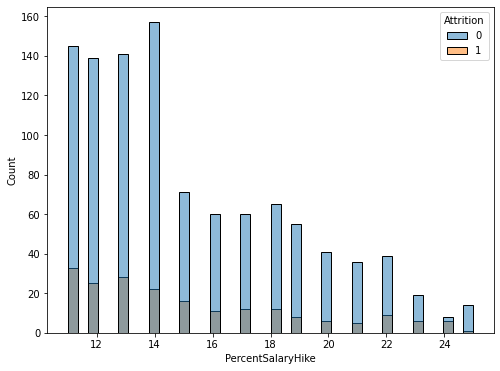

In [321]:
plt.figure(figsize=(8, 6))
sns.histplot(x=feature, data = data, hue = target, bins=40)
plt.show()

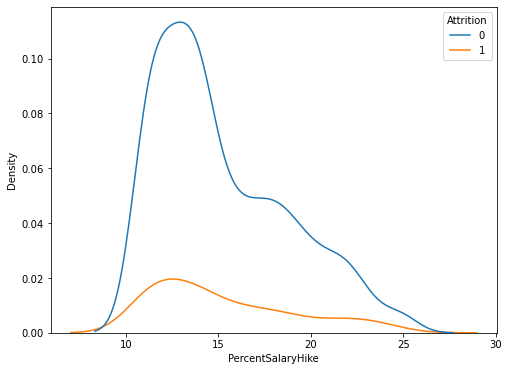

In [322]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=feature, data = data, hue = target)
plt.show()

② 수치화 : (참고)로지스틱회귀

In [323]:
model = sm.Logit(data['Attrition'], data['PercentSalaryHike'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.450230
         Iterations 5
PercentSalaryHike    3.979995e-95
dtype: float64


분석 결과

> - 전년대비 급여 인상율이 낮을 수록 이직율이 높은 경향이 있다.
> - 참고) 로지스틱 회귀 분석 결과 p-value가 0.05보다 작으므로 전년대비 급여 인상율과 이직여부는 관련이 있어 보인다.

## 4.관계 정리

### 1) 강한관계의 변수

- MonthlyIncome(월급) --> Attrition(이직 여부)

### 2) 약한관계의 변수

- DistanceFromHome(집-직장 거리) --> Attrition(이직 여부)
- PercentSalaryHike(전년대비 급여인상율) --> Attrition(이직 여부)

### 3) 관계 없음

- JobSatisfaction(직무 만족도) --> Attrition(이직 여부)
- RelationshipSatisfaction(동료와의 관계)  --> Attrition(이직 여부)
- WorkLifeBalance(워라밸. 일-삶 균형도) --> Attrition(이직 여부)

## 5.추가 분석

 - JobSatisfaction(직무 만족도)
     - 직무 만족도를 '만족'/'만족하지 않음' 2가지 범주로 나누고 분석을 한 결과 카이제곱 검정 p-value가 개선이 되었고 (0.998 -> 0.07)
     - 전체 이직율의 평균과 두 집단의 차이가 존재했다.
     - 범주를 나눈 직무 만족도와 이직 여부는 약한 상관관계가 있어 보인다.

- RelationshipSatisfaction(동료와의 관계)
     - 직무 만족도를 '좋음'/'좋지 않음' 2가지 범주로 나누고 분석을 한 결과 카이제곱 검정 p-value가 개선이 되었고 (0.999 -> 0.06)
     - 전체 이직율의 평균과 두 집단의 차이가 존재했다.
     - 범주를 나눈 동료와의 관계와 이직 여부는 약한 상관관계가 있어 보인다.

- WorkLifeBalance(워라밸. 일-삶 균형도)
     - 직무 만족도를 '만족하지 않음'/'만족' 2가지 범주로 나누고 분석을 한 결과 카이제곱 검정 p-value가 개선이 되었고 (0.993 -> 0.141)
     - 전체 이직율의 평균과 두 집단의 차이가 존재했지만 집단을 나누는 비율이 맞지 않았다.
     - 범주를 나눈 직무 만족도와 이직 여부는 관계가 없어 보인다.